In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
y

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [130]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


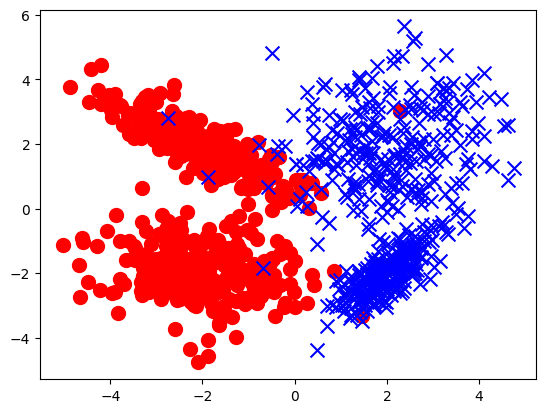

In [131]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [132]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        return np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    def gradi 
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)ees(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [133]:
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [134]:
logreg = LogReg()

In [135]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [136]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [137]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [138]:
y_pred_proba = logreg.predict_proba(X)

In [139]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [140]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

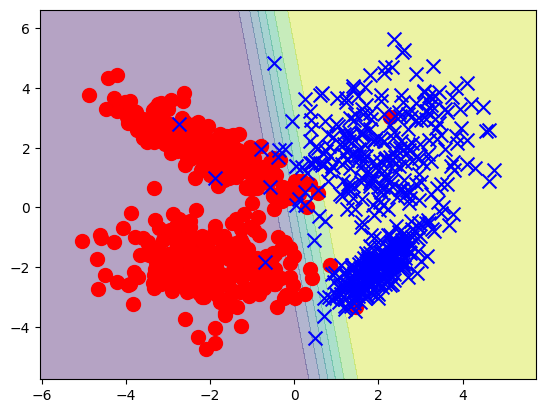

In [141]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [142]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [143]:
model.fit(X, y)
y_pred_lr = model.predict(X)

In [144]:
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [145]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [146]:
Z = model.predict_proba(XX)
Z = Z[:, 1].reshape(xx.shape)

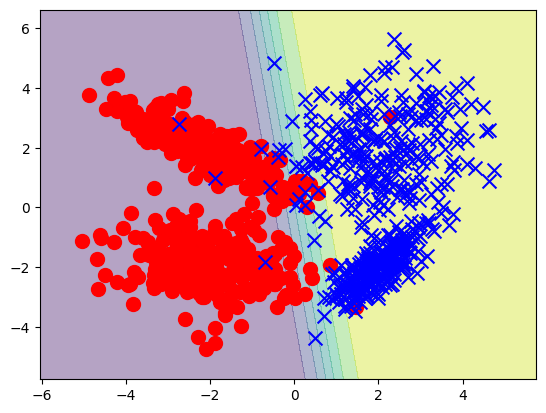

In [147]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

# 2

In [149]:
model2 = LogReg(alpha=9.4, n_iters=1000)
model2.fit(X, y)    
y_pred_lr2 = model2.predict(X)

In [150]:
ac = accuracy_score(y, y_pred_lr2)
f1 = f1_score(y, y_pred_lr2)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


# 3

In [ ]:
class SGD2():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def X_prepare(self, X):
        return np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        X = self.X_prepare(X)
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [186]:
class LogRegModified(SGD2):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        X = self.X_prepare(X) 
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

# 4

In [ ]:
X2,y2 = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=5,
                          random_state=1)
X2

array([[ 4.86341137,  3.08764555],
       [-4.53099717,  4.90118241],
       [-3.01722404, -5.59111159],
       ...,
       [ 5.33019532,  7.72180951],
       [-5.01084076,  4.42633933],
       [-5.00873243,  5.24540194]], shape=(1000, 2))

In [201]:
model3 = LogRegModified(alpha=0.1, n_iters=1000)
model3.fit(X2, y2)
y_pred3 = model3.predict(X2)


In [202]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred3)
f1 = f1_score(y, y_pred3)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 1.00 F1-score = 1.00


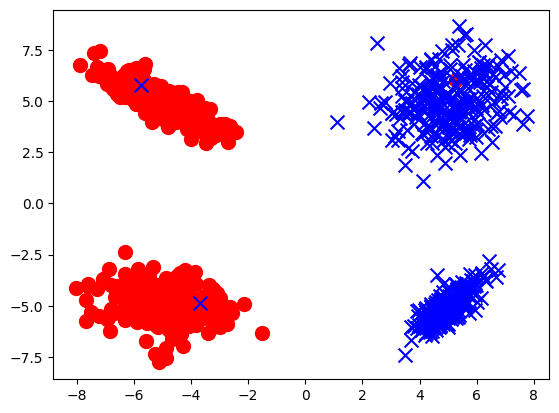

In [203]:
plt.scatter(X2[:, 0][y2==0], X2[:, 1][y2==0], marker="o", c='r', s=100)
plt.scatter(X2[:, 0][y2==1], X2[:, 1][y2==1], marker="x", c='b', s=100)
plt.show()

# 5

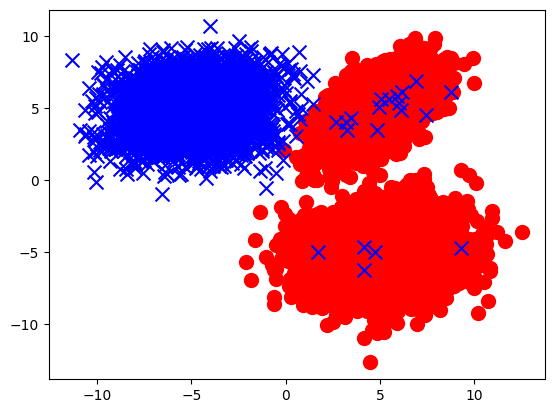

In [ ]:
X3,y3 = make_classification (n_samples=10000,
                          n_features=10,
                          n_informative=9,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=5,
                          random_state=1)
plt.scatter(X3[:, 0][y3==0], X3[:, 1][y3==0], marker="o", c='r', s=100)
plt.scatter(X3[:, 0][y3==1], X3[:, 1][y3==1], marker="x", c='b', s=100)

plt.show()

In [211]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# Генерация датасета с несколькими классами
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    n_classes=4,  # 4 класса
    random_state=42
)

# Реализация OvA
class OvAClassifier:
    def __init__(self, base_model):
        self.base_model = base_model
        self.models = []

    def fit(self, X, y):
        self.models = []
        for class_label in np.unique(y):
            # Создаем бинарные метки для текущего класса
            y_binary = (y == class_label).astype(int)
            model = self.base_model()
            model.fit(X, y_binary)
            self.models.append(model)

    def predict(self, X):
        # Получаем вероятности для каждого класса
        probs = np.array([model.predict_proba(X) for model in self.models])
        # Выбираем класс с максимальной вероятностью
        return np.argmax(probs, axis=0)

# Используем LogRegModified как базовую модель
ova_clf = OvAClassifier(lambda: LogRegModified(alpha=0.1, n_iters=1000))
ova_clf.fit(X, y)
y_pred = ova_clf.predict(X)

# Оценка качества
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Генерация датасета с несколькими классами
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    n_classes=4,  # 4 класса
    random_state=42
)

# Обучение модели LogisticRegression
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X, y)

# Вывод вероятностей для каждого объекта
probabilities = model.predict_proba(X)

# Печать первых 5 строк вероятностей
print("Вероятности принадлежности к классам (первые 5 объектов):")
print(probabilities[:5])

Вероятности принадлежности к классам (первые 5 объектов):
[[7.48930529e-01 1.31960256e-01 1.19068899e-01 4.03164216e-05]
 [3.01630787e-01 1.97779657e-02 6.71915103e-01 6.67614462e-03]
 [1.66496178e-03 2.31644459e-02 2.91604571e-01 6.83566022e-01]
 [2.64572921e-03 7.72220127e-02 1.37635161e-01 7.82497097e-01]
 [2.49760819e-01 6.53271097e-01 3.00563943e-02 6.69116896e-02]]


/home/fampkin/Desktop/ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
